# Introduction to Keras

Keras is a High Level API above Tensorflow to design Neural Network. In the next release of Tensorflow, it will be the default way to build such models [(General Introduction Guide)](https://www.tensorflow.org/guide/keras).

Look at the following code. It produce the same network as the precedent notebook.
You can inspect the learning by lauching tensorboard on the "logs" folder:

```bash
tensorboard --logdir=logs
```



Init Plugin
Init Graph Optimizer
Init Kernel


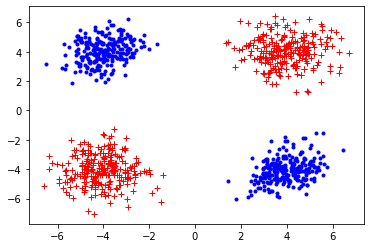

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt


def generate_all_dataset():
    # --- Fake dataset ---

    np.random.seed(0)

    ntrain = 1000
    nvalid = 100
    ntest = 100

    mupos = np.array([4., 4.])
    sigmapos = np.array([[1., 0.], [0., 1.]])
    muneg = np.array([4., -4.])
    sigmaneg = np.array([[.7, .2], [.2, .7]])

    def generate_a_dataset(mupos, sigmapos, muneg, sigmaneg, n):
        nelem = int(n/4)
        npos1 = n-nelem*3
        npos2, nneg1, nneg2 = nelem, nelem, nelem

        Xpos1 = np.random.multivariate_normal(mupos, sigmapos, npos1)
        Ypos1 = np.stack((np.ones((npos1,)), np.zeros((npos1,))), axis=1)
        Xpos2 = np.random.multivariate_normal(-mupos, sigmapos, npos2)
        Ypos2 = np.stack((np.ones((npos2,)), np.zeros((npos2,))), axis=1)

        Xneg1 = np.random.multivariate_normal(muneg, sigmaneg, nneg1)
        Yneg1 = np.stack((np.zeros((nneg1,)), np.ones((nneg1,))), axis=1)
        Xneg2 = np.random.multivariate_normal(-muneg, sigmaneg, nneg2)
        Yneg2 = np.stack((np.zeros((nneg2,)), np.ones((nneg2,))), axis=1)

        X = np.concatenate((Xpos1, Xpos2, Xneg1, Xneg2))
        Y = np.concatenate((Ypos1, Ypos2, Yneg1, Yneg2))

        idx = np.arange(n)
        np.random.shuffle(idx)

        X, Y = X[idx], Y[idx]

        return np.array(X, dtype='float32'), np.array(Y, dtype='float32')

    Xtrain, Ytrain = generate_a_dataset(
        mupos, sigmapos, muneg, sigmaneg, ntrain)
    Xvalid, Yvalid = generate_a_dataset(
        mupos, sigmapos, muneg, sigmaneg, nvalid)
    Xtest, Ytest = generate_a_dataset(mupos, sigmapos, muneg, sigmaneg, ntest)

    return (Xtrain, Ytrain), (Xvalid, Yvalid), (Xtest, Ytest)


def plot_dataset(X, Y):
    plt.figure()
    idpos, = np.nonzero(Y[:, 0] == 1.)
    idneg, = np.nonzero(Y[:, 1] == 1.)
    plt.plot(X[idpos, 0], X[idpos, 1], 'r+')
    plt.plot(X[idneg, 0], X[idneg, 1], 'b.')
    plt.show()


def demo(trainset, validset, testset):
    plot_dataset(*trainset)


demo(*generate_all_dataset())

Metal device set to: Apple M1


2021-09-10 18:06:41.810453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-10 18:06:41.810541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-09-10 18:06:41.871173: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-09-10 18:06:41.871181: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-09-10 18:06:41.871309: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 10)                30        
_________________________________________________________________
Layer2 (Dense)               (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 11/200 [>.............................] - ETA: 1s - loss: 0.6725 - categorical_accuracy: 0.6000 

2021-09-10 18:06:42.014219: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-10 18:06:42.014401: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-09-10 18:06:42.098505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-10 18:06:42.143537: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-09-10 18:06:42.143546: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-09-10 18:06:42.148882: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-09-10 18:06:42.149342: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-09-10 18:06:42.150257: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/ml

200/200 [==============================] - 1s 5ms/step - loss: 0.7023 - categorical_accuracy: 0.5090 - val_loss: 0.6935 - val_categorical_accuracy: 0.5000
Epoch 2/100
 28/200 [===>..........................] - ETA: 0s - loss: 0.7023 - categorical_accuracy: 0.5429

2021-09-10 18:06:43.095359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 1s 4ms/step - loss: 0.7009 - categorical_accuracy: 0.5000 - val_loss: 0.6984 - val_categorical_accuracy: 0.5000
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.7010 - categorical_accuracy: 0.5170 - val_loss: 0.6948 - val_categorical_accuracy: 0.5000
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.7012 - categorical_accuracy: 0.5330 - val_loss: 0.7059 - val_categorical_accuracy: 0.5000
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.7006 - categorical_accuracy: 0.5210 - val_loss: 0.7020 - val_categorical_accuracy: 0.5000
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.6960 - categorical_accuracy: 0.5450 - val_loss: 0.7158 - val_categorical_accuracy: 0.5000
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.7010 - categorical_accuracy: 0.5140 - val_loss: 0.7048 - val_categorical_accuracy: 0.5000
Epoch 8/10

2021-09-10 18:08:04.670072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


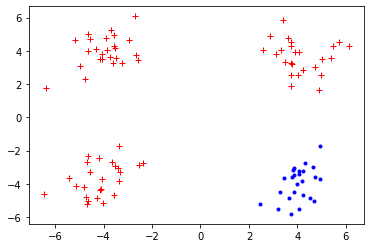

In [2]:
def mlpkerasv1(trainset, validset, testset):

    # Reset keras
    keras.backend.clear_session()

    Xtrain, Ytrain = trainset
    _, ninputs = Xtrain.shape
    _, noutputs = Ytrain.shape
    Xvalid, Yvalid = validset
    Xtest, Ytest = testset

    nhiddens = 10

    # Build the model
    model = keras.Sequential()
    model.add(keras.layers.Dense(nhiddens,  # indicates the number of outputs for that layer,
                                 activation='sigmoid',  # indicates the activation function of the layer
                                 kernel_initializer=keras.initializers.Zeros(),  # optional weight initializer
                                 bias_initializer=keras.initializers.Zeros(),  # optional bias initializer
                                 input_shape=Xtrain[0].shape, # optional the shape of the input
                                 name='Layer1'  # optional layer name
                                 ))
    model.add(keras.layers.Dense(noutputs,
                                 activation='softmax',
                                 kernel_initializer='zeros',  # equivalent notation as precedent layer
                                 bias_initializer='zeros',
                                 name='Layer2'
                                 ))

    # Compile the model with optimizer, loss and metrics
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=1e-1),  # indicates the optimizer
        loss=keras.losses.categorical_crossentropy,  # indicates the training loss,
        # loss='categorical_crossentropy' # equivalent notation
        metrics=[keras.metrics.categorical_accuracy]  # indicates the metrics
        # metrics=['categorical_accuracy'] # equivalent notation
    )
    
    # print out a summup of the model
    model.build(Xtrain[0].shape) #need to be called before summary 
    model.summary()

    # Optional : tensorboard logfiles
    logdir = "logs/mlp/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,
                                                       histogram_freq=1)

    # The actual training
    model.fit(Xtrain, Ytrain,  # training dataset, you can also give a tensorflow dataset here
              epochs=100, batch_size=5,
              validation_data=(Xvalid, Yvalid),
              # optional for tensorboard logging
              callbacks=[tensorboard_callback],
              )

    # Evaluation of the model on the tet set
    # Compute outputs on the test set
    Ytestpred = model.predict(Xtest) > .5

    plot_dataset(Xtest, Ytestpred)

    # That's all !


mlpkerasv1(*generate_all_dataset())

## Exercise

In fact that model behave very badly on that very simple dataset...

Improve the model training by modifying the following aspects:

- the weight initialization [available initializers](https://www.tensorflow.org/api_docs/python/tf/keras/initializers)
- the optimizer [available optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
- the number of hidden units (reduce them)
- the batch size (increase it)
- the learning rate (reduce it)

Actually you can converge in few (<20) iterations on that dataset


## Sequential API

Here we have used the sequential API of Keras to instantiate our model. It is made for Feed Forward Neural Network where the information always flow from one layer to the other.

A simple two layer perceptron:
```python
    model = keras.Sequential()
    model.add(keras.layers.Dense(60,activation='sigmoid'))
    model.add(keras.layers.Dense(10,activation='softmax'))
```

## Functional API

If you want more complex model, such a resnet where information can jump above a layer you need to used the functional API.

Here is a network with a skip connection:
```python
    inputs = tf.keras.Input(shape=(32,))  # Returns a placeholder tensor
    h1 = keras.layers.Dense(60,activation='sigmoid')(inputs) # you call the layer on the inputs
    h2  = keras.layers.Dense(60,activation='sigmoid')(h1)
    h1plush2 = keras.layers.Add()([h1, h2]) # skip connection
    outputs = keras.layers.Dense(10,activation='softmax')(h1plush2)
    
    model = keras.Model(inputs=inputs, outputs=predictions) # Actual creation of the model
```

## Saving and loading a model

You can save a model into a hdf5 file by using the `save`method. Both configuration and parameters are recorded.

```python
    my_keras_model.save('myfile.h5')
```

Recreate the exact same model, including weights and optimizer.

```python
    my_loaded_keras_model = keras.models.load_model('myfile.h5')
```